<a href="https://colab.research.google.com/github/stanley1208/AI-Learning/blob/main/BasicModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

In [50]:
X,y=make_moons(n_samples=400,noise=0.25,random_state=0)
X__train,X__test,y__train,y__test=train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
# Convert to tensors
X__train=torch.tensor(X__train,dtype=torch.float32)
y__train=torch.tensor(y__train,dtype=torch.float32).reshape(-1,1)
X__test=torch.tensor(X__test,dtype=torch.float32)
y__test=torch.tensor(y__test,dtype=torch.float32).reshape(-1,1)

In [52]:
class LogisticModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(2,1)  # 2 inputs → 1 output neuron

  def forward(self,x):
    z=self.linear(x)      # z = W^T x + b
    y_hat=torch.sigmoid(z)  # σ(z)
    return y_hat

model=LogisticModel()

In [53]:
model1=LogisticModel()
criterion=nn.BCELoss()  # Binary cross entropy loss
optimizer=optim.SGD(model.parameters(),lr=0.01)


for epoch in range(500):
  y_pred=model(X__train)
  loss=criterion(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%100==0:
    print(f"epoch: {epoch+1:3d} | loss: {loss.item():.4f}")

epoch: 100 | loss: 0.6460
epoch: 200 | loss: 0.5778
epoch: 300 | loss: 0.5328
epoch: 400 | loss: 0.5013
epoch: 500 | loss: 0.4780


In [54]:
class TwoLayerNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden=nn.Linear(2,8)  # 2 inputs -> 8 hidden neurons
    self.relu=nn.ReLU()     # adds nonlinearity
    self.output=nn.Linear(8,1) # hidden -> output
    self.sigmoid=nn.Sigmoid()   # squashes to [0,1]

  def forward(self,x):
    h=self.relu(self.hidden(x))     # h = ReLU(W1x + b1)
    y_hat=self.sigmoid(self.output(h))  # ŷ = σ(W2h + b2)
    return y_hat

In [55]:
model2=TwoLayerNet()
criterion=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

for epoch in range(500):
  y_pred=model(X__train)
  loss=criterion(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%100==0:
    print(f"epoch: {epoch+1:3d} | loss: {loss.item():.4f}")


epoch: 100 | loss: 0.4601
epoch: 200 | loss: 0.4460
epoch: 300 | loss: 0.4344
epoch: 400 | loss: 0.4249
epoch: 500 | loss: 0.4168


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def easy_plot_boundary(model, X, y, title):
    # Convert tensors to numpy
    X_np = X.detach().numpy()
    y_np = y.detach().numpy().ravel()

    # Create a grid over the feature space
    x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5
    y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Get model predictions
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)

    # Plot filled contour for predictions
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.3, cmap="coolwarm")
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap="coolwarm", edgecolor="k")
    plt.title(title)
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.show()


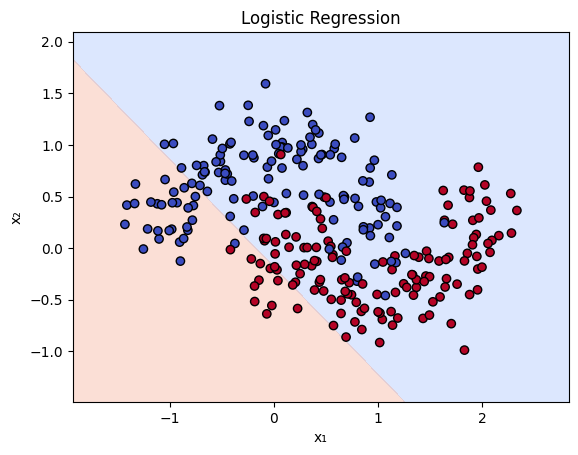

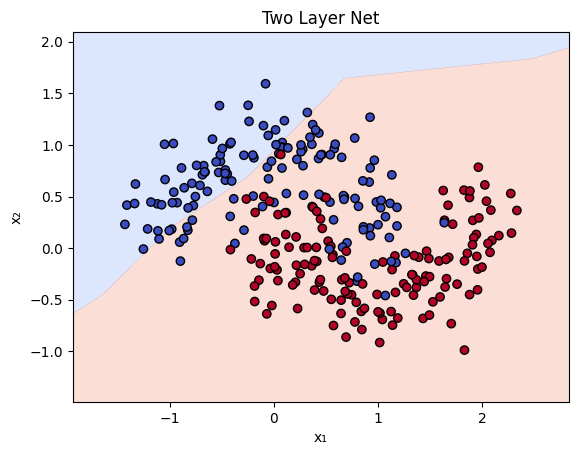

In [57]:
easy_plot_boundary(model1,X__train,y__train,"Logistic Regression")
easy_plot_boundary(model2,X__train,y__train,"Two Layer Net")